## Feature Selection 

What is feature selection done ? 
- Feature selection is a method of selecting only those features which are actually having some effect on the outcome of the problem. 

Why is feature selection done? 
- Sometimes there are many input features in the dataset that do not have any correlation with the target variable and including them in the algorithm causes the algorithm to perform bad and also increases the requirement for computation.  

What is curse of dimensionality ? 
- There are certain problems which comes in when the number of features in the dataset increase above a certain number. The problems mainly being very slow computation of some simple task and also reducing the accuracy of the machine learning model. Also if there are lots of features then there is a problem of overfitting lurking above our head all the time. 

Methods of feature selection 

1. Univariate feature selection

2. L1 Regularisation 

3. Heatmap

#### Univariate feature selection

The simplest and fastest methods are based on univariate statistical tests. For each feature, measure how strongly the target depends on the feature using a statistical test like  χ2  or ANOVA.

Library that I will use mainly is selectKbest module of sci kit learn module. It basically selects the best k number of features from your dataset. The k value can be specified by the user. 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2


In [2]:
df = pd.read_csv(r'D:\Repositories\Skillboost-ml\Datasets\Titanic Survival Prediction - Train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.drop(['Cabin','Age','Embarked','Ticket','Name'],axis = 1, inplace = True)

In [5]:
Y = df.iloc[:,1]
df.drop('Survived', axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [23]:
type(Y)

pandas.core.series.Series

In [7]:
X = pd.get_dummies(df)

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Sex_female   891 non-null    uint8  
 6   Sex_male     891 non-null    uint8  
dtypes: float64(1), int64(4), uint8(2)
memory usage: 36.7 KB


In [9]:
selector = SelectKBest(score_func = chi2, k=3)

X_new = selector.fit_transform(X,Y)
X_new

array([[ 7.25  ,  0.    ,  1.    ],
       [71.2833,  1.    ,  0.    ],
       [ 7.925 ,  1.    ,  0.    ],
       ...,
       [23.45  ,  1.    ,  0.    ],
       [30.    ,  0.    ,  1.    ],
       [ 7.75  ,  0.    ,  1.    ]])

In [10]:
score = pd.DataFrame(selector.scores_)
features = pd.DataFrame(X.columns)

In [11]:
feature_score = pd.concat([score, features], axis = 1)
feature_score

,0,0
0,3.312934,PassengerId
1,30.873699,Pclass
2,2.581865,SibSp
3,10.097499,Parch
4,4518.319091,Fare
5,170.348127,Sex_female
6,92.702447,Sex_male


             PassengerId    Pclass     SibSp     Parch      Fare
PassengerId     1.000000 -0.035144 -0.057527 -0.001652  0.012658
Pclass         -0.035144  1.000000  0.083081  0.018443 -0.549500
SibSp          -0.057527  0.083081  1.000000  0.414838  0.159651
Parch          -0.001652  0.018443  0.414838  1.000000  0.216225
Fare            0.012658 -0.549500  0.159651  0.216225  1.000000


<AxesSubplot:>

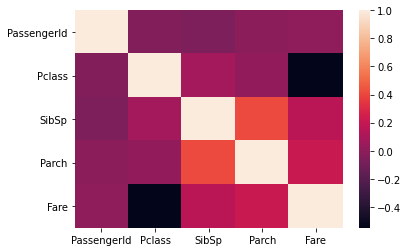

In [15]:
import seaborn as sns
corr = df.corr()
print(corr)
sns.heatmap(corr)

In [16]:
df = pd.read_csv(r'D:\Repositories\Skillboost-ml\Datasets\Titanic Survival Prediction - Train.csv')

In [18]:
corr_total = df.corr()
print(corr_total)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<AxesSubplot:>

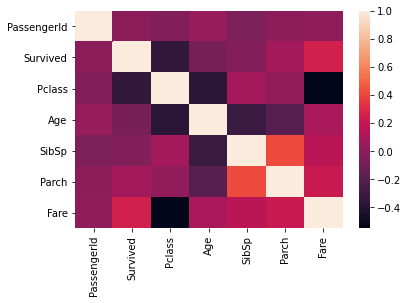

In [19]:
sns.heatmap(corr_total)